In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
import tensorflow

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
'''
import tensorflow as tf
pre_model= tf.keras.applications.VGG16(include_top=False,
                             weights='imagenet',
                             input_shape=(150,150,3))
                             
                             '''

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:

train_datagen = ImageDataGenerator(rescale = 1./255,rotation_range=15,
                                    width_shift_range=0.15,
                                    height_shift_range=0.15,
                                    shear_range=0.15,
                                    zoom_range=0.15,
                                    horizontal_flip=True,
                                  )
val_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
#Batch Size and Image Size
batch_sz = 64
sz = 48

train_generator = train_datagen.flow_from_directory('../input/fer-dsc-v3/final_data_v5/final_data_v5/Train',
                                                    batch_size = batch_sz,
                                                    class_mode='categorical',
                                                    target_size=(sz,sz))

val_generator = val_datagen.flow_from_directory('../input/fer-dsc-v3/final_data_v5/final_data_v5/Test',
                                                    batch_size = batch_sz,
                                                    class_mode='categorical',
                                                    target_size=(sz,sz))

Found 13651 images belonging to 4 classes.
Found 1649 images belonging to 4 classes.


In [5]:
from keras.applications.vgg16 import VGG16

pre_model = VGG16(include_top = False,
                 weights = 'imagenet',
                 input_shape = (48,48,3))

58892288/58889256 [==============================] - 0s 0us/step


In [6]:
pre_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 48, 48, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0     

In [7]:
for layer in pre_model.layers:
    layer.trainable=False

last_output = pre_model.get_layer('block5_conv2').output

In [8]:


x = tf.keras.layers.GlobalAveragePooling2D()(last_output)
x = tf.keras.layers.Flatten()(last_output)
x = tf.keras.layers.Dense(256,activation='relu')(x)
#x = tf.keras.layers.Dense(32,activation= 'swish')(x)
tf.keras.layers.Dropout(rate=0.3)(x)
x = tf.keras.layers.Dense(128,activation= 'swish')(x)
#x = tf.keras.layers.Dense(16,activation= 'swish')(x)
tf.keras.layers.Dropout(rate=0.1)(x)
x = tf.keras.layers.Dense(4,activation='softmax')(x)

model = tf.keras.Model(pre_model.input, x)

In [9]:
opt = tf.keras.optimizers.RMSprop(learning_rate=1e-5)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

history = model.fit(train_generator,
                   validation_data=val_generator,
                    steps_per_epoch=train_generator.samples//train_generator.batch_size,
                   validation_steps=val_generator.samples//val_generator.batch_size,
                    epochs=30
                    )

Epoch 1/30
53/53 [==============================] - 39s 737ms/step - loss: 1.8014 - accuracy: 0.2526 - val_loss: 1.4125 - val_accuracy: 0.3001
Epoch 2/30
53/53 [==============================] - 22s 408ms/step - loss: 1.4012 - accuracy: 0.2591 - val_loss: 1.3701 - val_accuracy: 0.2982
Epoch 3/30
53/53 [==============================] - 21s 394ms/step - loss: 1.3820 - accuracy: 0.2744 - val_loss: 1.3529 - val_accuracy: 0.3275
Epoch 4/30
53/53 [==============================] - 21s 397ms/step - loss: 1.3649 - accuracy: 0.3034 - val_loss: 1.3343 - val_accuracy: 0.3529
Epoch 5/30
53/53 [==============================] - 21s 402ms/step - loss: 1.3553 - accuracy: 0.3203 - val_loss: 1.3291 - val_accuracy: 0.3848
Epoch 6/30
53/53 [==============================] - 21s 398ms/step - loss: 1.3404 - accuracy: 0.3462 - val_loss: 1.2943 - val_accuracy: 0.4049
Epoch 7/30
53/53 [==============================] - 21s 397ms/step - loss: 1.3281 - accuracy: 0.3679 - val_loss: 1.3197 - val_accuracy: 0.4160

In [10]:
for layer in model.layers:
    layer.trainable = True

In [11]:
opt1 = tf.keras.optimizers.Adam(learning_rate = 1e-4)
model.compile(optimizer = opt1, loss='categorical_crossentropy', metrics=['accuracy'])

history1 = model.fit(train_generator,
                    validation_data = val_generator,
                    validation_steps = val_generator.samples // val_generator.batch_size,
                    epochs = 25)
                    #callbacks = [callbacks])

Epoch 1/25
54/54 [==============================] - 22s 414ms/step - loss: 1.3858 - accuracy: 0.2338 - val_loss: 1.3864 - val_accuracy: 0.2214
Epoch 2/25
54/54 [==============================] - 24s 445ms/step - loss: 1.3863 - accuracy: 0.2584 - val_loss: 1.3861 - val_accuracy: 0.2695
Epoch 3/25
54/54 [==============================] - 23s 421ms/step - loss: 1.3862 - accuracy: 0.2655 - val_loss: 1.3862 - val_accuracy: 0.2604
Epoch 4/25
54/54 [==============================] - 23s 435ms/step - loss: 1.3861 - accuracy: 0.2655 - val_loss: 1.3859 - val_accuracy: 0.2630
Epoch 5/25
54/54 [==============================] - 23s 423ms/step - loss: 1.3860 - accuracy: 0.2655 - val_loss: 1.3858 - val_accuracy: 0.2663
Epoch 6/25
54/54 [==============================] - 23s 418ms/step - loss: 1.3859 - accuracy: 0.2655 - val_loss: 1.3856 - val_accuracy: 0.2708
Epoch 7/25
54/54 [==============================] - 24s 442ms/step - loss: 1.3858 - accuracy: 0.2655 - val_loss: 1.3856 - val_accuracy: 0.2650

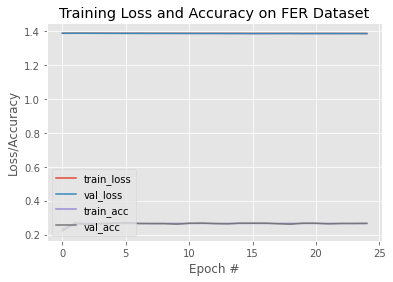

In [12]:
N=25
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history1.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history1.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history1.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history1.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on FER Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")

In [13]:

model.save('VGG_16_modified.h5')

model.save_weights('VGG16_modified_weights.h5')

from keras.models import model_from_json
# serialize model to json
json_model = model.to_json()
#save the model architecture to JSON file
with open('VGG16_modified_model.json', 'w') as json_file:
    json_file.write(json_model)


In [14]:

test = '../input/fer-dsc-v3/final_data_v5/final_data_v5/Test'
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory (test, batch_size=256, class_mode='categorical', target_size=(48,48))

model.evaluate(test_generator, steps=4)

Found 1649 images belonging to 4 classes.
4/4 [==============================] - 0s 122ms/step - loss: 1.3837 - accuracy: 0.2676


[1.383683681488037, 0.267578125]